# Подбор параметров для learning_rate для XGBoost

Используется датасет Otto Group Product Classification Challenge.
https://www.kaggle.com/c/otto-group-product-classification-challenge/data?select=train.csv

### Подбор Learning Rate в XGBoost

In [11]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import numpy
import matplotlib
from matplotlib import pyplot
%matplotlib inline


In [3]:
# Загрузка и разбиение 
data = read_csv('train.csv')
dataset = data.values
# split data into X and y
X = dataset[:,0:94]
y = dataset[:,94]
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)

In [4]:
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)

E:\anaconda3\envs\keras\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [5]:
# summarize results
print("BestParam: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

BestParam: -0.001155 using {'learning_rate': 0.3}
-2.153330 (0.000009) with: {'learning_rate': 0.0001}
-1.827377 (0.000066) with: {'learning_rate': 0.001}
-0.590581 (0.000296) with: {'learning_rate': 0.01}
-0.001270 (0.001075) with: {'learning_rate': 0.1}
-0.001167 (0.001060) with: {'learning_rate': 0.2}
-0.001155 (0.001053) with: {'learning_rate': 0.3}


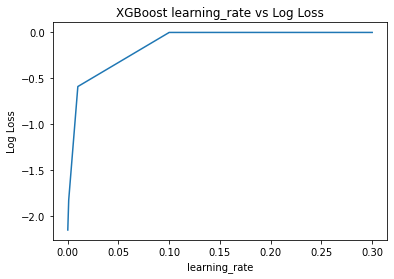

<Figure size 432x288 with 0 Axes>

In [12]:
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.show()

### Подбор Rate и Number of Trees (n_estimators) in XGBoost


In [13]:
# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)

E:\anaconda3\envs\keras\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
# Вывод результатов
print("BestParam: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

BestParam: -0.001182 using {'learning_rate': 0.1, 'n_estimators': 200}
-2.153330 (0.000009) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-2.111313 (0.000018) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-2.071024 (0.000026) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-2.032331 (0.000035) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-1.995114 (0.000043) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-1.827377 (0.000066) with: {'learning_rate': 0.001, 'n_estimators': 100}
-1.560993 (0.000096) with: {'learning_rate': 0.001, 'n_estimators': 200}
-1.354499 (0.000129) with: {'learning_rate': 0.001, 'n_estimators': 300}
-1.187332 (0.000158) with: {'learning_rate': 0.001, 'n_estimators': 400}
-1.048158 (0.000183) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.590581 (0.000296) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.208812 (0.000301) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.076537 (0.000445) with: {'learning_rate': 0.01,

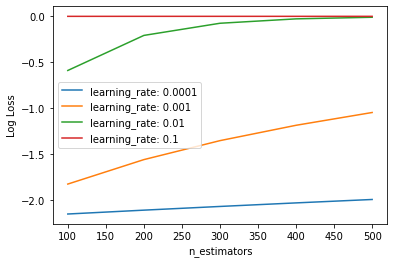

In [15]:
# Отрисуем результат
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.show()

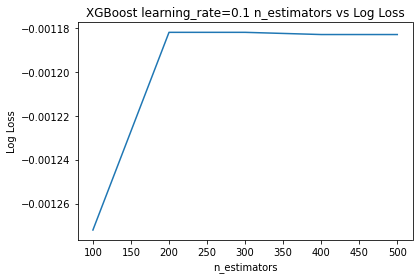

In [18]:
n_estimators = [100, 200, 300, 400, 500]
loss = [-0.001272, -0.001182, -0.001182, -0.001183, -0.001183]
pyplot.plot(n_estimators, loss)
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost learning_rate=0.1 n_estimators vs Log Loss')
pyplot.show()